# Atividade prática 1
### Robô aspirador autônomo

Vocês estão projetando um sistema para calcular a trajetória de um robô aspirador autônomo.
Inicialmente, o sistema deve ser capaz de conduzir o robô ladeando as paredes de um cômodo sem que haja colisões.
Por isso, ele deverá passar pelo seguinte teste.

Considerem uma parede representada por uma reta $L$ no plano euclideano, definida pelos pontos $P(12,12)$ e $Q(24,24)$.
Suponha o robô inicialmente posicionado no ponto $O(0,17\delta)$, onde $\delta = 2^{-53}$.
A tarefa de vocês é calcular uma trajetória para que o robô se desloque até que a distância horizontal entre $O$ e sua posição ao final da trajetória atinja $34\delta$.

O robô deve se manter sempre o mais próximo possível da parede, mas nunca andar sobre ela, nem atravessá-la.
A cada movimentação do robô, ele pode dar um passo de tamanho $\delta$ ao longo do eixo $x$ (andar na horizontal) ou do eixo $y$ (andar na vertical), ou de ambos ao mesmo tempo (andar na diagonal).

## Teste de orientação

Os únicos dados que estarão disponíveis para embasar a decisão de parada ou movimentação do robô serão os pontos $O(O_x, O_y)$, $P(P_x, P_y)$, $Q(Q_x, Q_y)$ e sua posição atual, denotada por $R(R_x,R_y)$.
Da geometria analítica, sabemos que é possível classificar a posição relativa do ponto $R$ com relação à reta $L$ gerada por $P$ e $Q$ como:

* à esquerda de $L$;
* sobre a reta $L$;
* à direita de $L$.

Algebricamente, a orientação estabelecida pelos pontos $P$, $Q$ e $R$ varia de acordo com o sinal de um determinante:

\begin{align*}
\operatorname{orientacao}(P,Q,R) &= 
\operatorname{sinal}\left(\det \begin{bmatrix}1 & P_x & P_y\\
1 & Q_x & Q_y\\
1 & R_x & R_y \end{bmatrix}\right).
\end{align*}

O resultado será $\operatorname{orientacao}(P, Q, R) = +1$ se e somente se o ponto $R$ estiver à esquerda da reta $L$.
Já quando $\operatorname{orientacao}(P, Q, R)$ for igual a $-1$, o ponto $R$ estará à direita de $L$.
Os pontos serão colineares quando obtivermos $\operatorname{orientacao}(P, Q, R) = 0$.

## Cálculo da trajetória

*(a) Descrevam abaixo, em palavras, o algoritmo para o cálculo da trajetória do robô. Caso necessário, vocês poderão inserir figuras para ilustrar seu funcionamento. É mandatório o emprego do teste de orientação apresentado anteriormente.*

*Iniciando o robô no ponto $(0,17δ)$ o caminho com a mínina distância para reta $L$ é a diagonal em direção ao ponto $(8δ,9δ)$. Para mover o robô até o ponto $(8δ,9δ)$ vamos usar o teste de orientação para sua posição futura no eixo x, assim enquanto a orientação for possitiva ele continua se movimentando na descendente. Quando a orientação for 0 siginifica que o robô está a uma unidade de colidir com a reta $L$ então apartir desse ponto o robô vai se mover na diagonal ascendente em direção ao ponto $(34δ,35δ)$. Quando o robô percorrer uma distância horizontal de $34δ$ o algoritmo irá encerrar.* 

*(b) Coloquem na célula abaixo a implementação do algoritmo que acabaram de descrever.
 É mandatório o uso do teste de orientação apresentado anteriormente.
 Deve-se usar o tipo `float` da Python para armazenar as coordenadas dos pontos.*

In [20]:
import numpy as np

DELTA = float(2**-53)


def testa_onde(p, q, r):
    l1 = [float(1)]
    l2 = [float(1)]
    l3 = [float(1)]
    l1.extend(p)
    l2.extend(q)
    l3.extend(r)
    mat = np.array([l1, l2, l3])
    det = np.linalg.det(mat)
    return np.sign(det)


def main(t, t1):
    global DELTA
    o = [float(0), DELTA*17]
    p = [float(12), float(12)]
    q = [float(24), float(24)]
    r = o
    t.append(r[0])
    t1.append(r[1])
    while r[0] < 34*DELTA:
        if testa_onde(p, q, [r[0] + DELTA, r[1] - DELTA]) > 0:
            r[1] -= DELTA
            r[0] += DELTA
            t.append(r[0])
            t1.append(r[1])
        elif testa_onde(p, q, [r[0] + DELTA, r[1] + DELTA]) > 0:
            r[1] += DELTA
            r[0] += DELTA
            t.append(r[0])
            t1.append(r[1])
        elif testa_onde(p, q, [r[0] + DELTA, r[1]]) > 0:
            r[0] += DELTA
            t.append(r[0])
            t1.append(r[1])
        elif testa_onde(p, q, [r[0], r[1] + DELTA]) > 0:
            r[1] += DELTA
            t.append(r[0])
            t1.append(r[1])


t = list() # Guarda as posicoes do eixo x
t1 = list() # Guarda as posicoes do eixo y
main(t, t1)


## Desenho da trajetória

*(c) Desenhe a trajetória calculada usando a matplotlib. Fique à vontade para produzir animações.*

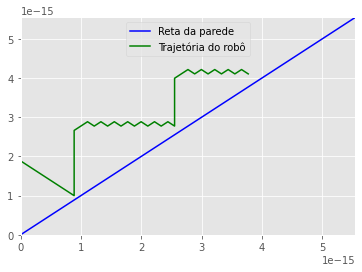

In [21]:
import matplotlib.pyplot as plt


def plota_trajetoria():
    global DELTA
    plt.style.use("ggplot")
    L = np.linspace(0, 24) # Reta L
    rx = list() # Lista para trajetoria do robo (eixo x)
    ry = list() # Lista para trajetoria do robo (eixo x)
    main(rx, ry)
    plt.axis([0, 50*DELTA, 0, 50*DELTA])
    plt.plot(L, L, color="blue")
    plt.plot(rx, ry, color='green')
    plt.legend(['Reta da parede', 'Trajetória do robô'], loc=9)


plota_trajetoria()

## Comprimento da trajetória

*(d) Calcule e exiba na tela o comprimento da trajetória calculada.*

In [22]:
def dist(p1x, p1y, p2x, p2y):
    return np.sqrt(np.power(p2x - p1x, 2) + np.power(p2y - p1y, 2))


distancia = 0
rx = list() # Lista para trajetoria do robo (eixo x)
ry = list() # Lista para trajetoria do robo (eixo x)
main(rx, ry)
for i in range(len(rx) - 1):
    distancia += dist(rx[i], ry[i], rx[i + 1], ry[i + 1])
print("A distancia percorrida pelo robô foi de: {} unidades".format(distancia))


A distancia percorrida pelo robô foi de: 8.224894223550236e-15 unidades


## Considerações finais

*(e) O que você achou da sua solução? Ela é a melhor possível? Quais foram as principais dificuldades encontradas?*

*A solução adotada é bastante simples, como o valor usado para o delta é muito pequeno ocorre erros para o cálculo do determinante em algumas regiões. Por isso a trajetória do robô acaba ficando distorcida. Por essa razão não é melhor resolução possível. A pricipal dificudade foi fazer o robô traçar a melhor trajetória a partir da solução da determinante oque não foi possível visto que a determinante não é exata em algumas regiões.*